In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from math import sqrt
import math

In [2]:
cp=40 #(Дж/К*моль)
mu=0.044 #(кг/моль)
g=9.8155
T=[18.36+273, 23.15+273, 30.16+273, 40.02+273, 50.00+273,60.01+273]
dP=0.1
dT=0.01
beta=[39.8, 40.7, 41.15, 42.05, 42.9, 43.7]

In [3]:
izm1=pd.read_csv('izm1.csv')
izm2=pd.read_csv('izm2.csv')
izm3=pd.read_csv('izm3.csv')
izm4=pd.read_csv('izm4.csv')
izm5=pd.read_csv('izm5.csv')
#izm1['eps']+=0.01
#izm2['eps']+=0.005
#izm3['eps']+=0.015
izm4['eps']+=0.01
izm5['eps']+=0.02
izm6=pd.read_csv('izm6.csv')
izm6['eps']+=0.03
izm6

,deltap,eps
0,4.0,0.099
1,3.5,0.082
2,3.0,0.070
3,2.5,0.060
4,2.0,0.052


In [4]:
izm1['P']=izm1['deltap']*g*10**(4)
izm2['P']=izm2['deltap']*g*10**(4)
izm3['P']=izm3['deltap']*g*10**(4)
izm4['P']=izm4['deltap']*g*10**(4)
izm5['P']=izm5['deltap']*g*10**(4)
izm6['P']=izm6['deltap']*g*10**(4)

In [5]:
izm1['dP']=dP*g*10**(4)
izm2['dP']=dP*g*10**(4)
izm3['dP']=dP*g*10**(4)
izm4['dP']=dP*g*10**(4)
izm5['dP']=dP*g*10**(4)
izm6['dP']=dP*g*10**(4)
izm1,izm2,izm3,  izm4, izm5, izm6

(   deltap    eps         P      dP
 0     4.0  0.169  392620.0  9815.5
 1     3.5  0.144  343542.5  9815.5
 2     3.0  0.121  294465.0  9815.5
 3     2.5  0.102  245387.5  9815.5
 4     2.0  0.077  196310.0  9815.5,
    deltap    eps         P      dP
 0     4.0  0.163  392620.0  9815.5
 1     3.5  0.139  343542.5  9815.5
 2     3.0  0.115  294465.0  9815.5
 3     2.5  0.093  245387.5  9815.5
 4     2.0  0.072  196310.0  9815.5,
    deltap    eps         P      dP
 0     4.0  0.151  392620.0  9815.5
 1     3.5  0.127  343542.5  9815.5
 2     3.0  0.106  294465.0  9815.5
 3     2.5  0.083  245387.5  9815.5
 4     2.0  0.065  196310.0  9815.5,
    deltap    eps         P      dP
 0     4.0  0.133  392620.0  9815.5
 1     3.5  0.112  343542.5  9815.5
 2     3.0  0.089  294465.0  9815.5
 3     2.5  0.073  245387.5  9815.5
 4     2.0  0.055  196310.0  9815.5,
    deltap    eps         P      dP
 0     4.0  0.122  392620.0  9815.5
 1     3.5  0.094  343542.5  9815.5
 2     3.0  0.077  29446

In [6]:
izm1['deltaT']=izm1['eps']*1000/beta[0]
izm2['deltaT']=izm2['eps']*1000/beta[1]
izm3['deltaT']=izm3['eps']*1000/beta[2]
izm4['deltaT']=izm4['eps']*1000/beta[3]
izm5['deltaT']=izm5['eps']*1000/beta[4]
izm6['deltaT']=izm6['eps']*1000/beta[5]
izm1, izm6

(   deltap    eps         P      dP    deltaT
 0     4.0  0.169  392620.0  9815.5  4.246231
 1     3.5  0.144  343542.5  9815.5  3.618090
 2     3.0  0.121  294465.0  9815.5  3.040201
 3     2.5  0.102  245387.5  9815.5  2.562814
 4     2.0  0.077  196310.0  9815.5  1.934673,
    deltap    eps         P      dP    deltaT
 0     4.0  0.099  392620.0  9815.5  2.265446
 1     3.5  0.082  343542.5  9815.5  1.876430
 2     3.0  0.070  294465.0  9815.5  1.601831
 3     2.5  0.060  245387.5  9815.5  1.372998
 4     2.0  0.052  196310.0  9815.5  1.189931)

In [7]:
izm1['dT']=izm1['deltaT']*(((0.000035*izm1['eps']+0.000005*100)/izm1['eps'])**2+(dT/izm1['deltaT'])**2)**(1/2)
izm2['dT']=izm2['deltaT']*(((0.000035*izm2['eps']+0.000005*100)/izm2['eps'])**2+(dT/izm2['deltaT'])**2)**(1/2)
izm3['dT']=izm3['deltaT']*(((0.000035*izm3['eps']+0.000005*100)/izm3['eps'])**2+(dT/izm3['deltaT'])**2)**(1/2)
izm4['dT']=izm4['deltaT']*(((0.000035*izm4['eps']+0.000005*100)/izm4['eps'])**2+(dT/izm4['deltaT'])**2)**(1/2)
izm5['dT']=izm5['deltaT']*(((0.000035*izm5['eps']+0.000005*100)/izm5['eps'])**2+(dT/izm5['deltaT'])**2)**(1/2)
izm6['dT']=izm6['deltaT']*(((0.000035*izm6['eps']+0.000005*100)/izm6['eps'])**2+(dT/izm6['deltaT'])**2)**(1/2)
izm1

,deltap,eps,P,dP,deltaT,dT
0,4.0,0.169,392620.0,9815.5,4.246231,0.016173
1,3.5,0.144,343542.5,9815.5,3.618090,0.016156
2,3.0,0.121,294465.0,9815.5,3.040201,0.016140
3,2.5,0.102,245387.5,9815.5,2.562814,0.016127
4,2.0,0.077,196310.0,9815.5,1.934673,0.016110


In [8]:
izm1['sigma']=(0.1**2+izm1['dT']**2)**(1/2)
sigma1=np.mean(izm1['sigma'])
izm2['sigma']=(0.1**2+izm2['dT']**2)**(1/2)
sigma2=np.mean(izm2['sigma'])
izm3['sigma']=(0.1**2+izm3['dT']**2)**(1/2)
sigma3=np.mean(izm3['sigma'])
izm4['sigma']=(0.1**2+izm4['dT']**2)**(1/2)
sigma4=np.mean(izm4['sigma'])
izm5['sigma']=(0.1**2+izm5['dT']**2)**(1/2)
sigma5=np.mean(izm5['sigma'])
izm6['sigma']=(0.1**2+izm6['dT']**2)**(1/2)
sigma6=np.mean(izm6['sigma'])
sigma=[sigma1, sigma2, sigma3, sigma4, sigma5, sigma6]
sigma

[0.10129435125692435,
 0.10125903279097992,
 0.10124152716621745,
 0.10120880363775171,
 0.10118003643133074,
 0.10115456211831353]

In [9]:
izm5, izm6

(   deltap    eps         P      dP    deltaT        dT     sigma
 0     4.0  0.122  392620.0  9815.5  2.843823  0.015433  0.101184
 1     3.5  0.094  343542.5  9815.5  2.191142  0.015415  0.101181
 2     3.0  0.077  294465.0  9815.5  1.794872  0.015405  0.101180
 3     2.5  0.063  245387.5  9815.5  1.468531  0.015396  0.101178
 4     2.0  0.053  196310.0  9815.5  1.235431  0.015390  0.101177,
    deltap    eps         P      dP    deltaT        dT     sigma
 0     4.0  0.099  392620.0  9815.5  2.265446  0.015256  0.101157
 1     3.5  0.082  343542.5  9815.5  1.876430  0.015245  0.101155
 2     3.0  0.070  294465.0  9815.5  1.601831  0.015238  0.101154
 3     2.5  0.060  245387.5  9815.5  1.372998  0.015232  0.101153
 4     2.0  0.052  196310.0  9815.5  1.189931  0.015227  0.101153)

In [10]:
np.polyfit(izm6['deltap'],izm6['deltaT'],1)

array([0.53089245, 0.06864989])

In [11]:
def param1(nag1):
    mx=np.mean(nag1['deltap'])
    my=np.mean(nag1['deltaT'])
    mxy=np.mean(nag1['deltap']*nag1['deltaT'])
    mx2=np.mean((nag1['deltap'])**2)
    my2=np.mean(nag1['deltaT']**2)
    k1=mxy/mx2
    sigmak11=(1/np.sqrt(5))*((my2/mx2)-k1**2)**(1/2)
    sigmak1=(sigmak11**2+0.1**2)**(1/2)
    return k1, sigmak1

In [12]:
k1, sigmak1= param1(izm1)
k2, sigmak2= param1(izm2)
k3, sigmak3= param1(izm3)
k4, sigmak4= param1(izm4)
k5, sigmak5= param1(izm5)
k6, sigmak6= param1(izm6)
print(sigmak6)
k=[k1, k2, k3, k4, k5, k6]
sigmak=[sigmak1, sigmak2, sigmak3, sigmak4, sigmak5, sigmak6]
kpa=[]
for i in range (6):
    kpa.append(k[i]/98155)
    sigmak[i]=sigmak[i]/98155
k, sigmak, kpa

0.10035180454051076


([1.0325310764348057,
  0.9621104357946463,
  0.8717784741318667,
  0.7427248263345643,
  0.6436020120230647,
  0.5525713597494881],
 [1.026092410205254e-06,
  1.0334925034589292e-06,
  1.0377769785737727e-06,
  1.039920914652501e-06,
  1.04364280521706e-06,
  1.0223809743824641e-06],
 [1.0519393575821971e-05,
  9.801950341751784e-06,
  8.88165120607067e-06,
  7.56685677076628e-06,
  6.556996709521315e-06,
  5.629579336248669e-06])

In [13]:
izm5

,deltap,eps,P,dP,deltaT,dT,sigma
0,4.0,0.122,392620.0,9815.5,2.843823,0.015433,0.101184
1,3.5,0.094,343542.5,9815.5,2.191142,0.015415,0.101181
2,3.0,0.077,294465.0,9815.5,1.794872,0.015405,0.101180
3,2.5,0.063,245387.5,9815.5,1.468531,0.015396,0.101178
4,2.0,0.053,196310.0,9815.5,1.235431,0.015390,0.101177


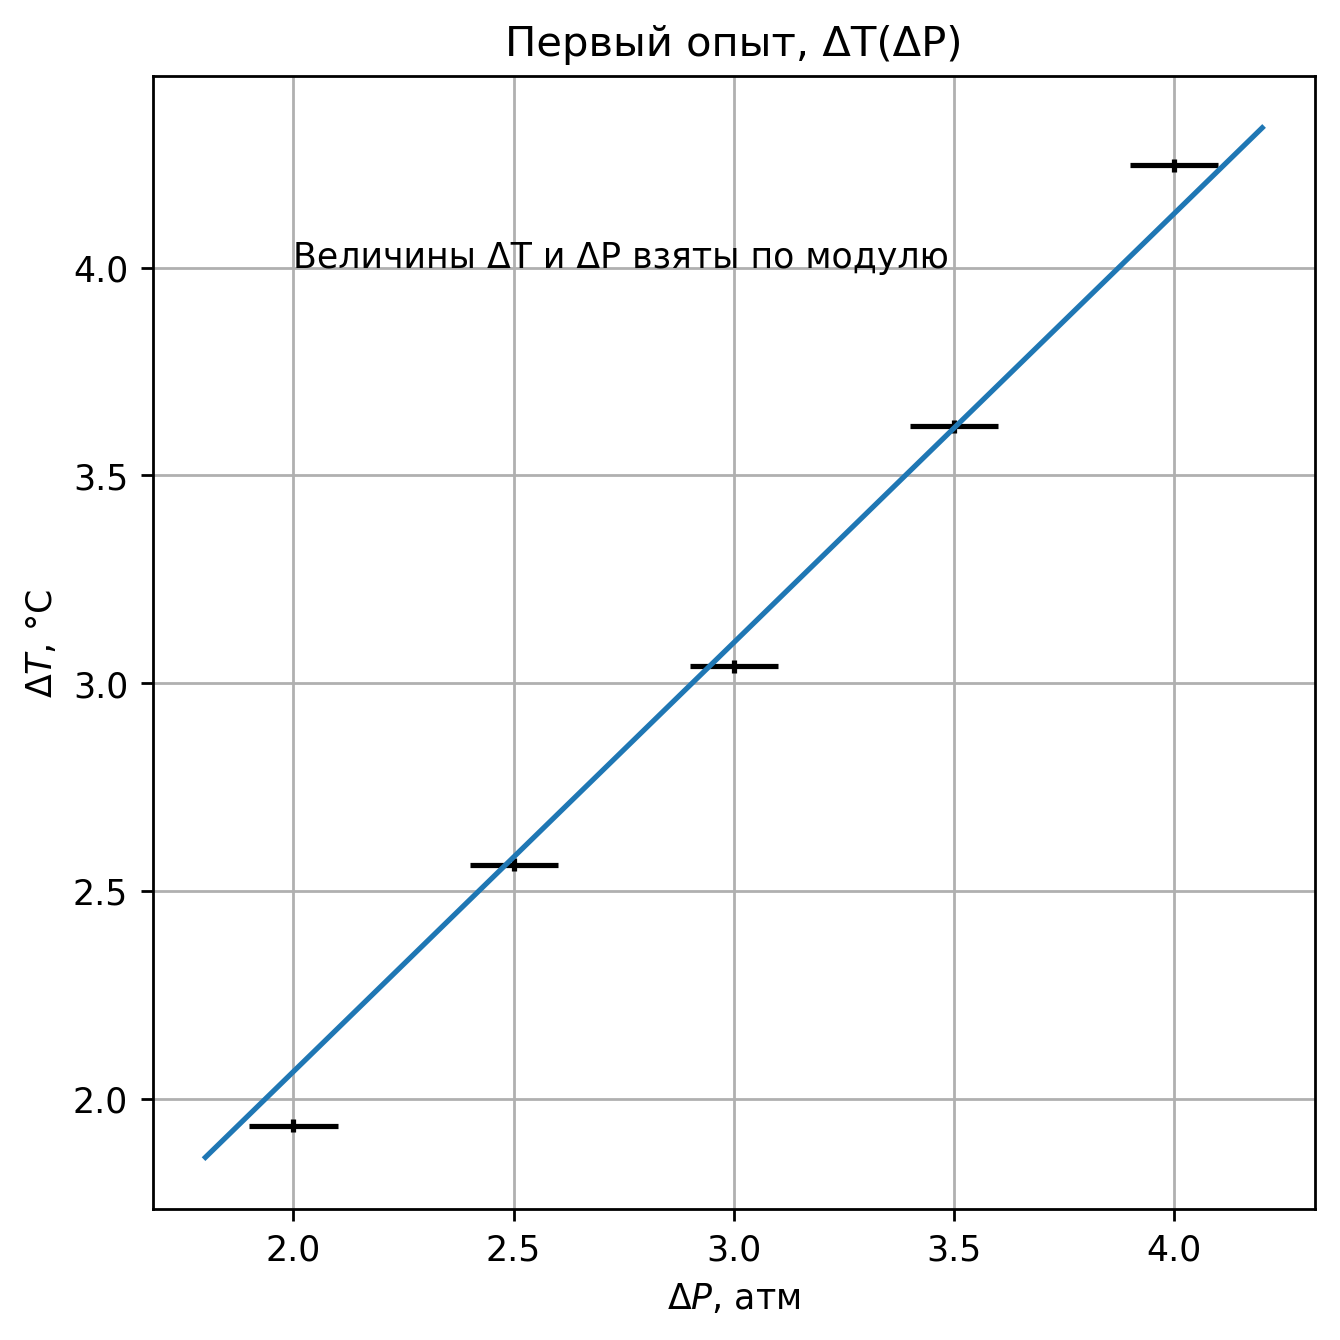

In [14]:
x=[1.8,4.2]
y=[]
for i in range (2):
    y.append(x[i]*k1)
plt.figure(figsize=(6,6), dpi=250)
plt.ylabel("$ΔT$, °C")
plt.xlabel("$ΔP$, атм")
plt.title('Первый опыт, ΔT(ΔP)')
plt.annotate('Величины ΔТ и ΔР взяты по модулю', xy=(2, 4))
plt.grid(True, linestyle="-")
plt.errorbar(izm1['deltap'], izm1['deltaT'], xerr=0.1, yerr=izm1['dT'], color='black',fmt='none' )
plt.plot(x, y)
plt.show()

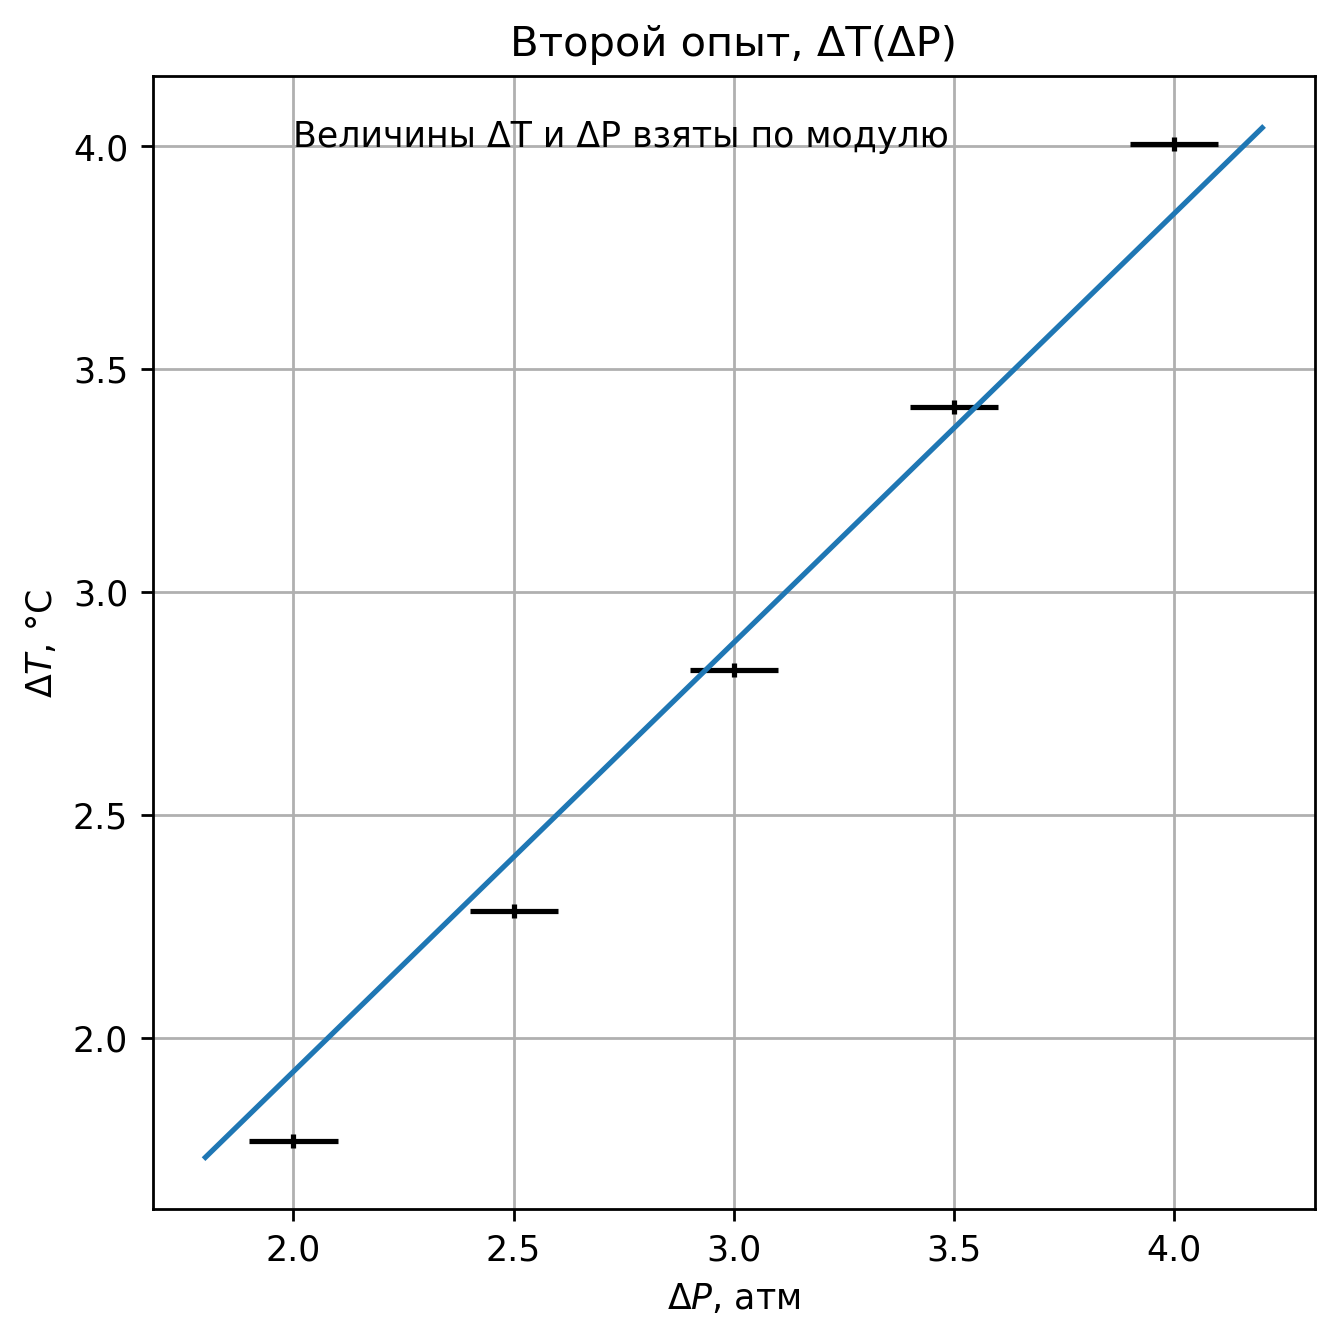

In [15]:
x=[1.8,4.2]
y=[]
for i in range (2):
    y.append(x[i]*k2)
plt.figure(figsize=(6,6), dpi=250)
plt.ylabel("$ΔT$, °C")
plt.xlabel("$ΔP$, атм")
plt.title('Второй опыт, ΔT(ΔP)')
plt.annotate('Величины ΔТ и ΔР взяты по модулю', xy=(2, 4))
plt.grid(True, linestyle="-")
plt.errorbar(izm2['deltap'], izm2['deltaT'], xerr=0.1, yerr=izm2['dT'], color='black',fmt='none' )
plt.plot(x, y)
plt.show()

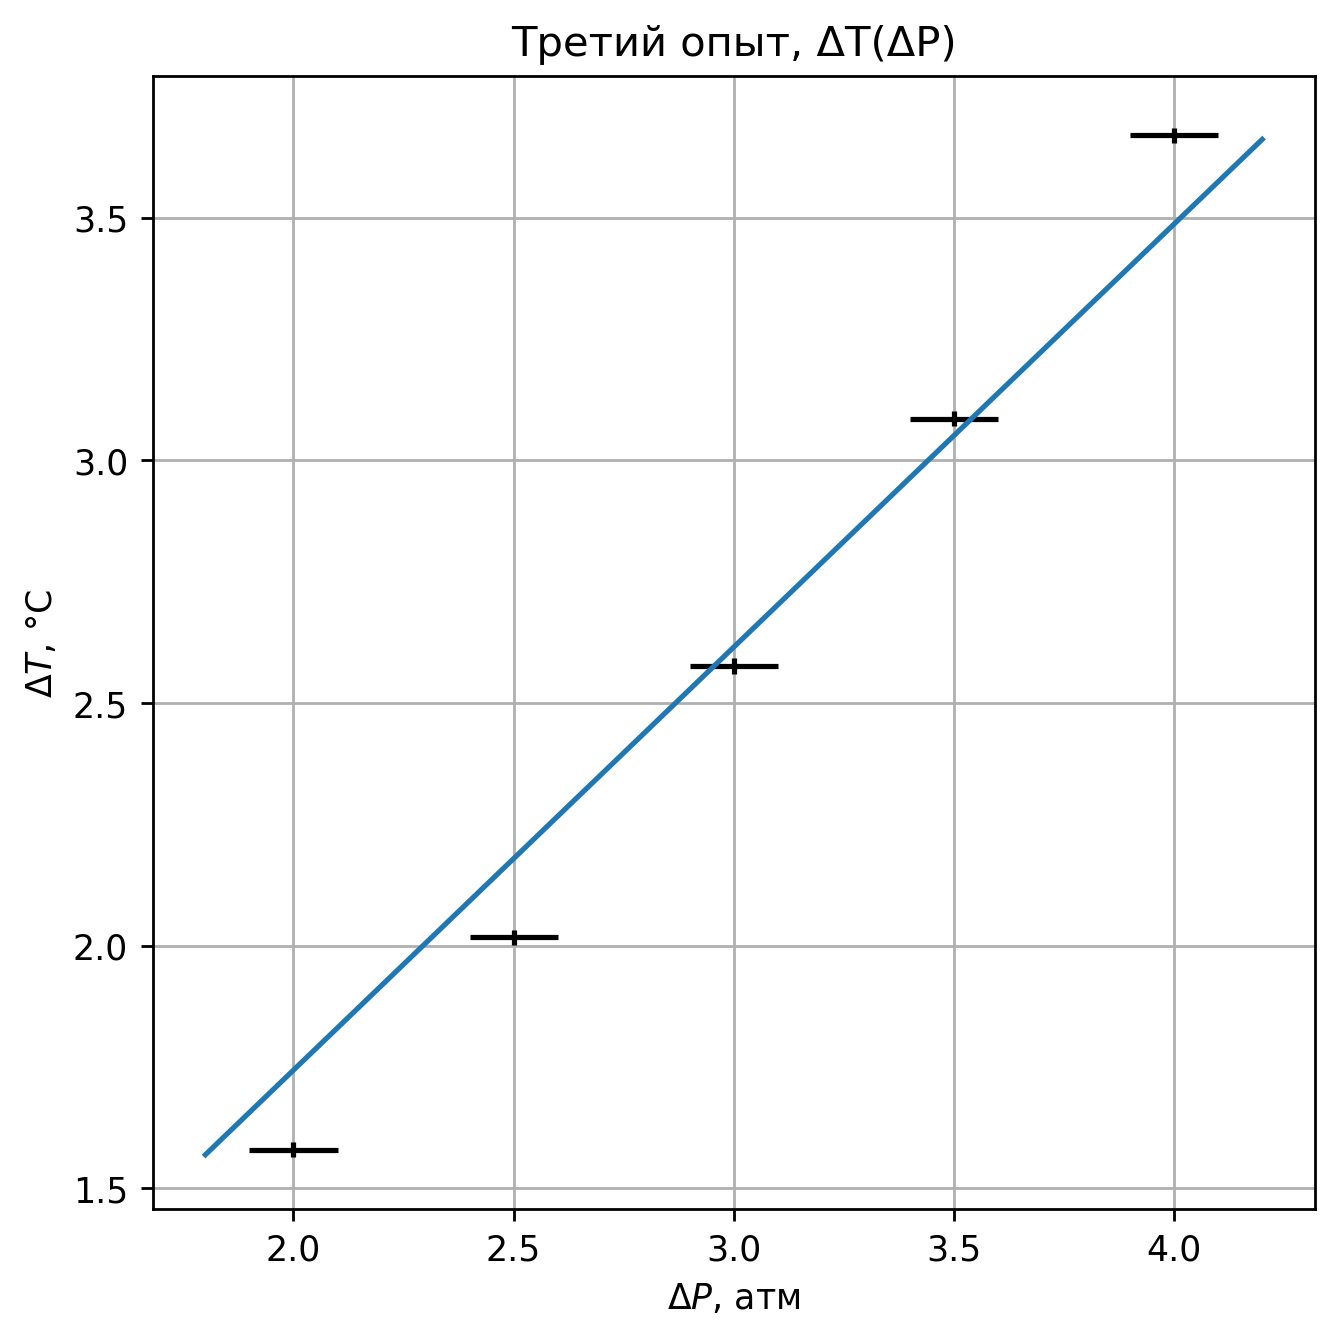

In [16]:
x=[1.8,4.2]
y=[]
for i in range (2):
    y.append(x[i]*k3)
plt.figure(figsize=(6,6), dpi=250)
plt.ylabel("$ΔT$, °C")
plt.xlabel("$ΔP$, атм")
plt.title('Третий опыт, ΔT(ΔP)')
plt.annotate('Величины ΔТ и ΔР взяты по модулю', xy=(2, 4))
plt.grid(True, linestyle="-")
plt.errorbar(izm3['deltap'], izm3['deltaT'], xerr=0.1, yerr=izm3['dT'], color='black',fmt='none' )
plt.plot(x, y)
plt.show()

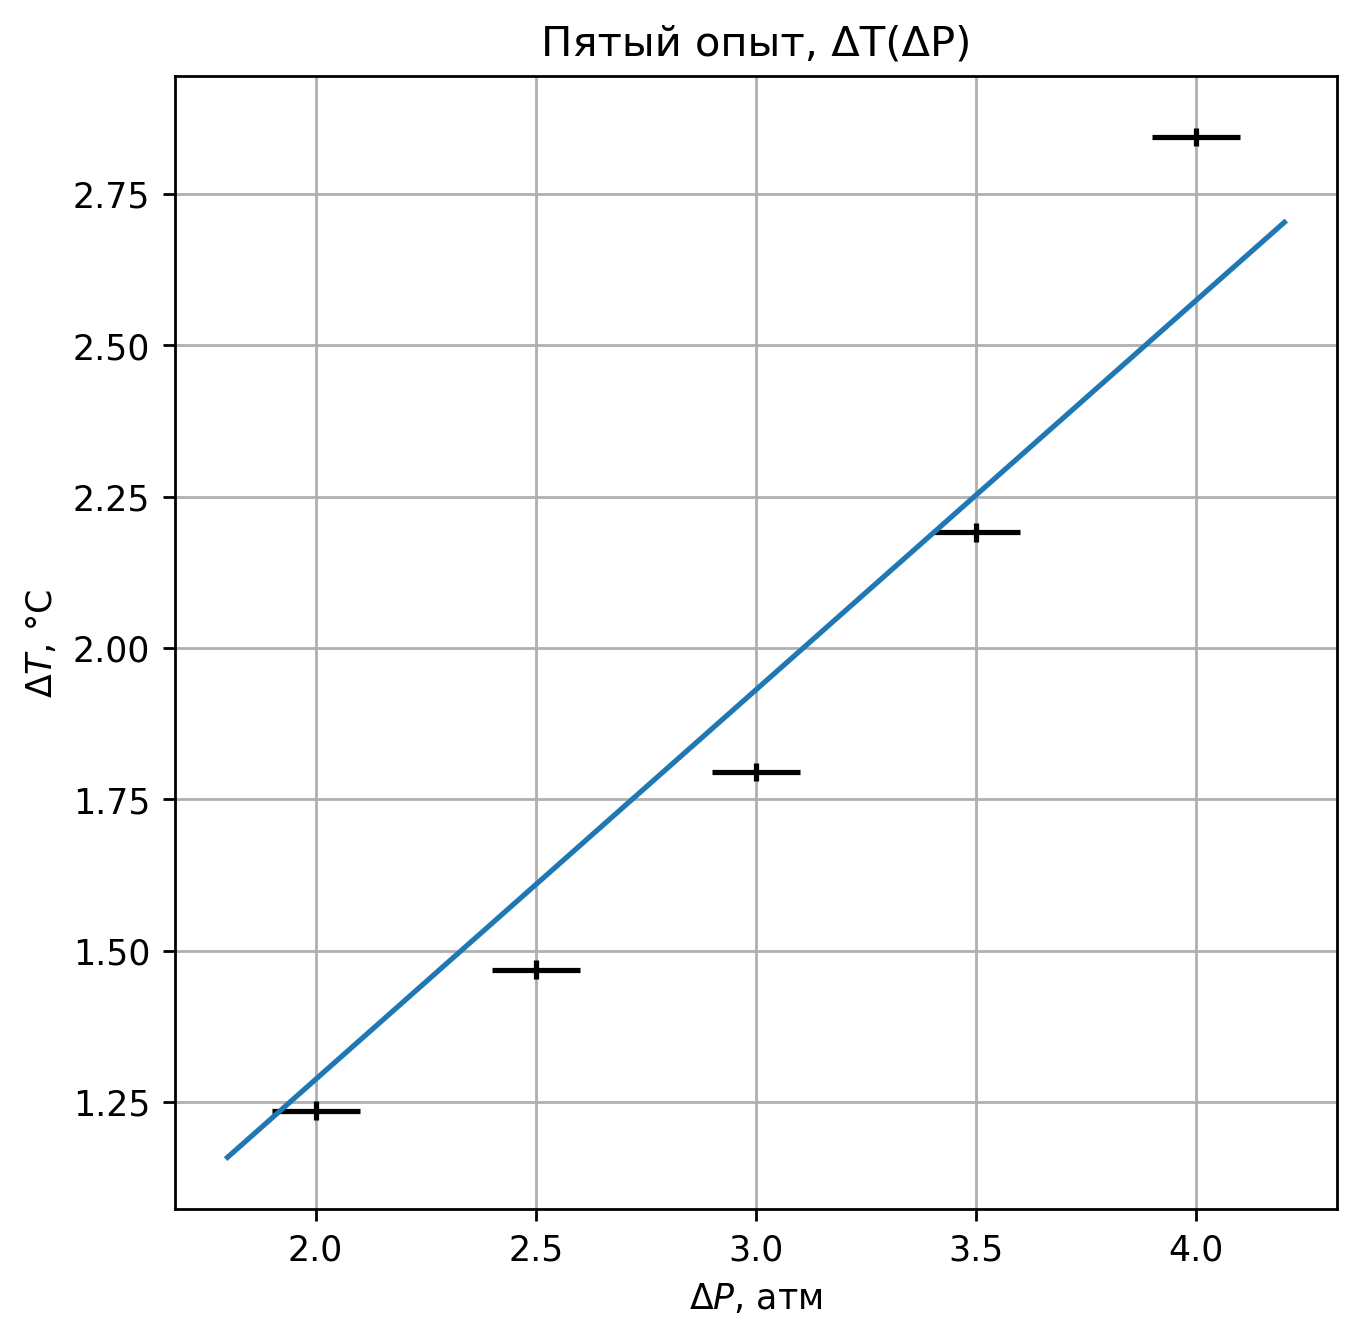

In [17]:
x=[1.8,4.2]
y=[]
for i in range (2):
    y.append(x[i]*k5)
plt.figure(figsize=(6,6), dpi=250)
plt.ylabel("$ΔT$, °C")
plt.xlabel("$ΔP$, атм")
plt.title('Пятый опыт, ΔT(ΔP)')
plt.annotate('Величины ΔТ и ΔР взяты по модулю', xy=(2, 4))
plt.grid(True, linestyle="-")
plt.errorbar(izm5['deltap'], izm5['deltaT'], xerr=0.1, yerr=izm5['dT'], color='black',fmt='none' )
plt.plot(x, y)
plt.show()

In [18]:
def param(nag1):
    mx=np.mean(T)
    my=np.mean(k)
    mxy=np.mean(nag1['deltap']*nag1['deltaT'])
    mx2=np.mean((nag1['deltap'])**2)
    my2=np.mean(nag1['deltaT']**2)
    k1=mxy/mx2
    sigmak11=(1/np.sqrt(5))*((my2/mx2)-k1**2)**(1/2)
    sigmak1=(sigmak11**2+0.1**2)**(1/2)
    return k1, sigmak1

In [19]:
np.polyfit(izm6['deltap'],izm6['deltaT'],1)

array([0.53089245, 0.06864989])

In [20]:
Tk=[]
for i in range (6):
    Tk.append(1/T[i])
vdv=pd.DataFrame({'k':kpa,'T':Tk, 'sigmak':sigmak[0:6], 'sigmaT':0.01})
vdv

,k,T,sigmak,sigmaT
0,0.000011,0.003432,0.000001,0.01
1,0.000010,0.003377,0.000001,0.01
2,0.000009,0.003299,0.000001,0.01
3,0.000008,0.003195,0.000001,0.01
4,0.000007,0.003096,0.000001,0.01
5,0.000006,0.003003,0.000001,0.01


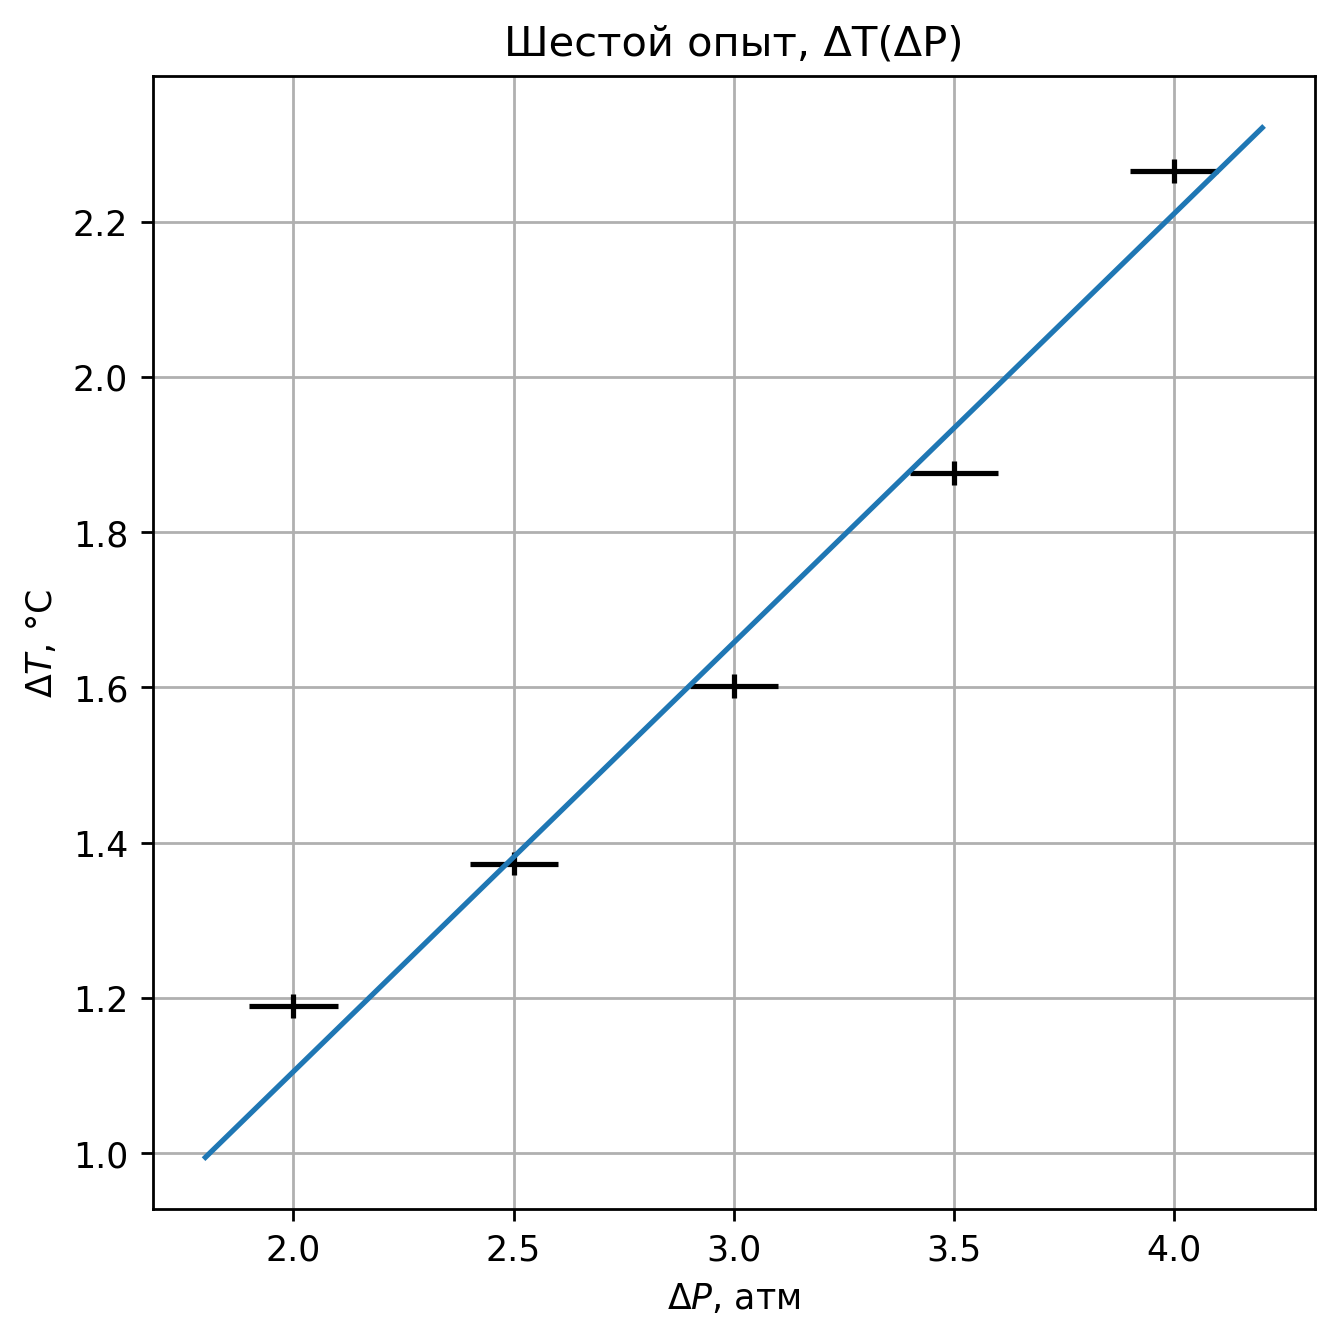

In [21]:
x=[1.8,4.2]
y=[]
for i in range (2):
    y.append(x[i]*k6)
plt.figure(figsize=(6,6), dpi=250)
plt.ylabel("$ΔT$, °C")
plt.xlabel("$ΔP$, атм")
plt.title('Шестой опыт, ΔT(ΔP)')
plt.annotate('Величины ΔТ и ΔР взяты по модулю', xy=(2, 4))
plt.grid(True, linestyle="-")
plt.errorbar(izm6['deltap'], izm6['deltaT'], xerr=0.1, yerr=izm6['dT'], color='black',fmt='none' )
plt.plot(x, y)
plt.show()

In [22]:
np.polyfit(vdv['T'], vdv['k'], 1)
vdv['sigmaT']=vdv['T']*(vdv['sigmaT']/300)
vdv

,k,T,sigmak,sigmaT
0,0.000011,0.003432,0.000001,1.144060e-07
1,0.000010,0.003377,0.000001,1.125556e-07
2,0.000009,0.003299,0.000001,1.099529e-07
3,0.000008,0.003195,0.000001,1.064895e-07
4,0.000007,0.003096,0.000001,1.031992e-07
5,0.000006,0.003003,0.000001,1.000971e-07


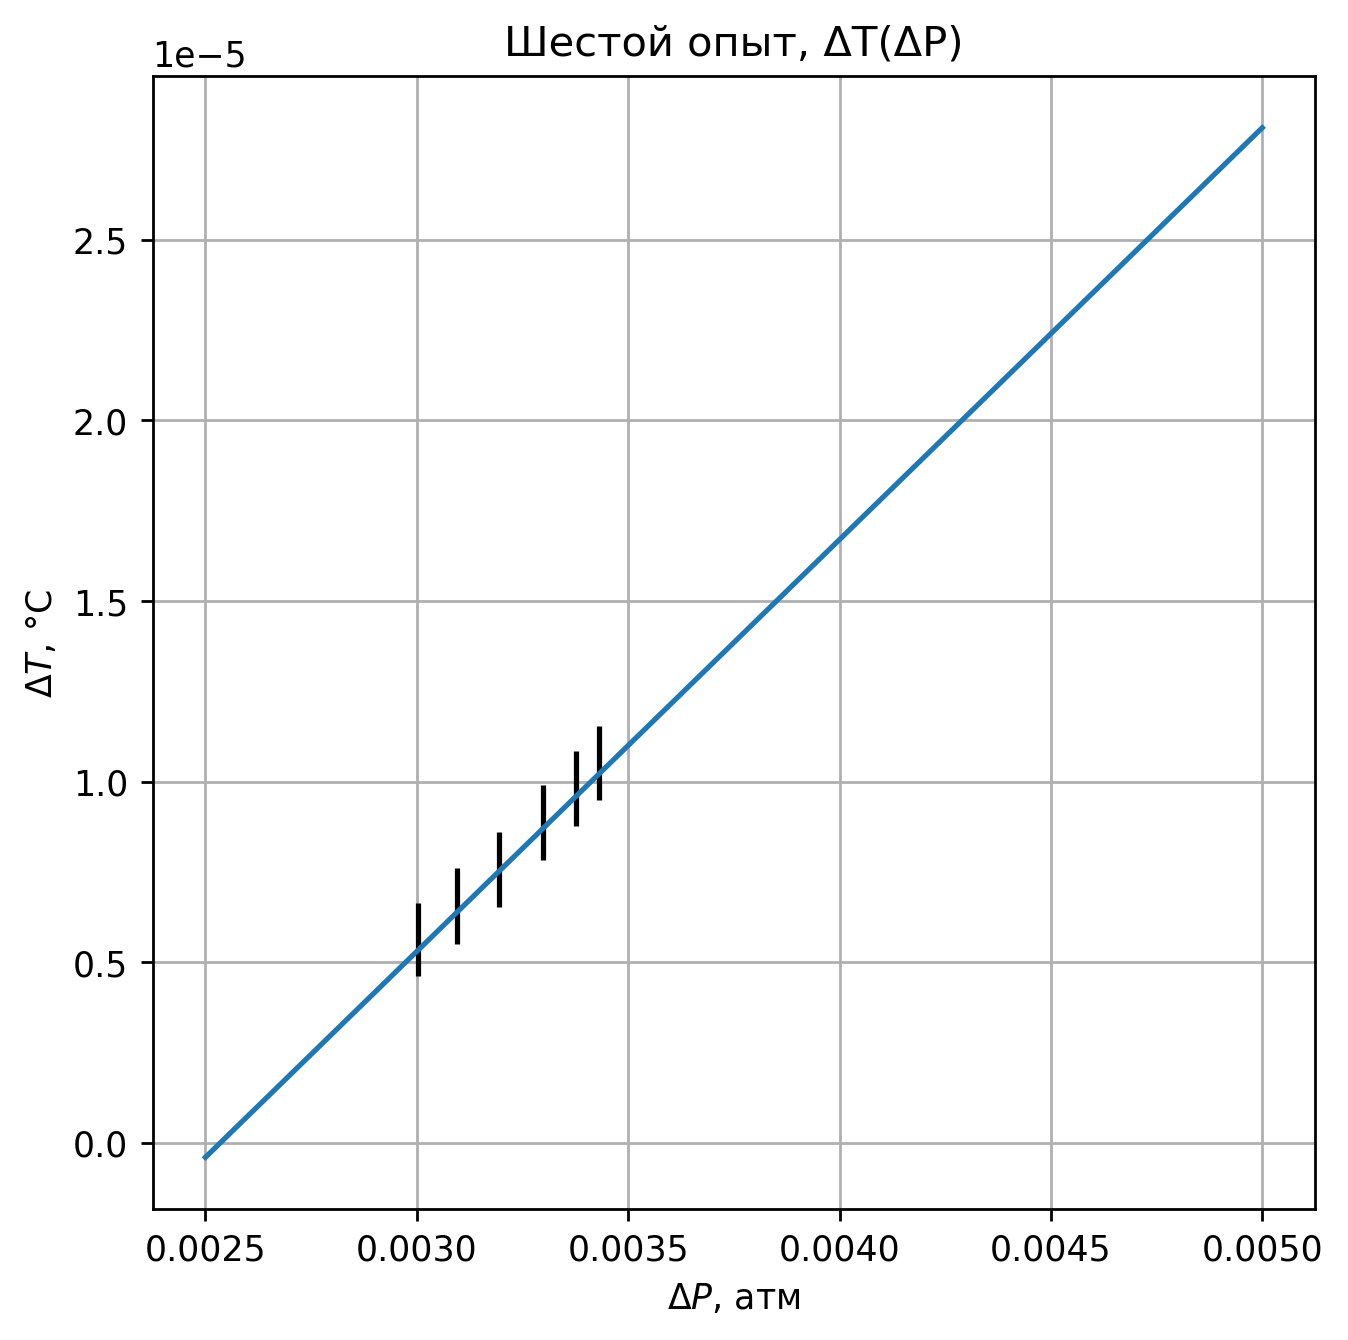

In [23]:
x=[0.0025,0.005]
y=[]
for i in range (2):
    y.append(x[i]*0.0114-2.89e-05)
plt.figure(figsize=(6,6), dpi=250)
plt.ylabel("$ΔT$, °C")
plt.xlabel("$ΔP$, атм")
plt.title('Шестой опыт, ΔT(ΔP)')
plt.annotate('Величины ΔТ и ΔР взяты по модулю', xy=(2, 4))
plt.grid(True, linestyle="-")
plt.errorbar(vdv['T'], vdv['k'], xerr=vdv['sigmaT'], yerr=vdv['sigmak'], color='black',fmt='none' )
plt.plot(x, y)
plt.show()

In [24]:
np.polyfit(izm5['deltap'],izm5['deltaT'],1)

array([ 0.78787879, -0.45687646])

In [33]:
vdv

,k,T,sigmak,sigmaT
0,0.000011,0.003432,0.000001,1.144060e-07
1,0.000010,0.003377,0.000001,1.125556e-07
2,0.000009,0.003299,0.000001,1.099529e-07
3,0.000008,0.003195,0.000001,1.064895e-07
4,0.000007,0.003096,0.000001,1.031992e-07
5,0.000006,0.003003,0.000001,1.000971e-07


In [25]:
def param2(nag1):
    mx=np.mean(nag1['T'])
    my=np.mean(nag1['k'])
    mxy=np.mean(nag1['T']*nag1['k'])
    mx2=np.mean((nag1['T'])**2)
    my2=np.mean(nag1['k']**2)
    k=(mxy-mx*my)/(mx2-mx**2)
    b=my-k*mx
    sigmak=np.sqrt(1/len(vdv))*np.sqrt((my2-my**2)/(mx2-mx**2)-k**2)
    k1=(nag1['k'][5]+nag1['sigmak'][5]-nag1['k'][0]+nag1['sigmak'][0])/(nag1['T'][5]+nag1['sigmaT'][5]-nag1['T'][0]+nag1['sigmaT'][0])
    k2=(nag1['k'][5]-nag1['sigmak'][5]-nag1['k'][0]-nag1['sigmak'][0])/(nag1['T'][5]-nag1['sigmaT'][5]-nag1['T'][0]-nag1['sigmaT'][0])
    #sigmako=((np.mean(vdv['sigmak'])/np.mean(vdv['k']))**2+(np.mean(vdv['sigmaT'])/np.mean(vdv['T']))**2)**(1/2)
    #sigmak=(sigmak**2+(sigmako*k)**2)**(1/2)
    sigmakk=(-k1+k2)/2
    sigmak=(sigmak**2+sigmakk**2)**(1/2)
    sigmab=sigmak*np.sqrt(mx2-mx**2)
    return k,b, sigmak, sigmab

In [26]:
a, b, sigmaa, sigmab=param2(vdv)
a, b, sigmaa, sigmab

(0.011449916887449955,
 -2.886391621257819e-05,
 0.004771743671085394,
 7.231390986809232e-07)

In [27]:
print(sigmaa*cp*8.31/2)
A=a*cp*8.31/2
sigmaA=sigmaa*cp*8.31/2
B=abs(b)*40
sigmaB=sigmab*cp
A, B, sigmaA, sigmaB

0.7930637981343925


(1.9029761866941826,
 0.0011545566485031277,
 0.7930637981343925,
 2.8925563947236926e-05)

In [28]:
sigmaB/B, sigmaA/A

(0.025053395157993038, 0.41674919722042836)

In [29]:
Tin=2*A/(8.31*B)
Tin
sigmaTin=Tin*((sigmaA/A)**2+(sigmaB/B)**2)**(1/2)
Tin, sigmaTin, sigmaTin/Tin

(396.68618780359265, 165.61710859984095, 0.41750157603632354)

In [30]:
def line(x, a, b):
    return a * x + b

params, cov = curve_fit(line, xdata=vdv['T'], ydata=vdv['k'])

In [31]:
print(f"a = {params[0]:.3} \u00B1 {np.sqrt(cov[0][0]):.2}")
print(f"b = {params[1]:.3} \u00B1 {np.sqrt(cov[1][1]):.2}")

a = 0.0114 ± 0.00028
b = -2.89e-05 ± 9e-07


In [32]:
params, cov

(array([ 1.14499169e-02, -2.88639163e-05]),
 array([[ 7.74244425e-08, -2.50352033e-10],
        [-2.50352033e-10,  8.11291762e-13]]))